### Test Corr Models

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import yfinance as yf

import dynamic_correlations as CM
import expected_shortfall as ES
import backtesting as BT
import plots as IP
import data_download as dd
import data_download_2 as dd2

### Data 

First is with past data download function, second is with the second version.

In [2]:
# # Step 1: Define tickers and shares
# tickers = [
#     "AAPL", "MSFT", "NVDA", "GOOGL", "JPM",
#     "UNH", "KO", "PEP", "BMW.DE", "NESN.SW",
#     "NOVN.SW", "ASML.AS"
# ]

# # Assign number of shares per asset
# shares = pd.Series(10, index=tickers)

# # Step 2: Download adjusted prices
# prices = dd.get_raw_prices(tickers, start="2018-01-01")

# # Step 3: Compute monetary positions
# x_matrix = prices * shares

# # Step 4: Convert positions to CHF
# x_matrix = dd.convert_to_base(x_matrix, base="CHF")

# # Step 5: Compute returns and summary stats
# returns, mean_returns, covariance_matrix = dd.compute_returns_stats(x_matrix)

# # Step 6: Display results
# print(f"\nPortfolio final value in CHF: {x_matrix.sum(axis=1).iloc[-1]:.2f}")
# print("\nSample of daily returns:\n", returns.head())
# print("\nMean returns (daily, in CHF):\n", mean_returns)
# print("\nCovariance matrix (in CHF):\n", covariance_matrix)


In [3]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 5,
    "NVDA": 8,
    "GOOGL": 6,
    "JPM": 7,
    "UNH": 4,
    "KO": -12,
    "PEP": 5,
    "BMW.DE": -3,     # short
    "NESN.SW": 0.2,   # fractional
    "NOVN.SW": 1.5,
    "ASML.AS": 2
})

# Step 1–2: Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd2.get_raw_prices(tickers, start="2022-01-01")

# Step 3: Convert prices to base currency (e.g. CHF)
prices_converted = dd2.convert_to_base(prices, base="CHF")

# Step 4: Create portfolio with monetary positions
x_matrix = dd2.create_portfolio(prices_converted, shares)

# Step 5: Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd2.compute_returns_stats(x_matrix)

# Step 6: Display
final_value = x_matrix.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] ASML.AS: EUR
[currency detection] BMW.DE: EUR
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] KO: USD
[currency detection] MSFT: USD
[currency detection] NESN.SW: CHF
[currency detection] NOVN.SW: CHF
[currency detection] NVDA: USD
[currency detection] PEP: USD
[currency detection] UNH: USD
[fx download] Downloading FX pairs: CHFUSD=X, CHFEUR=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] ASML.AS: EUR → CHF via CHFEUR=X
[conversion] BMW.DE: EUR → CHF via CHFEUR=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] KO: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X
[conversion] PEP: USD → CHF via CHFUSD=X
[conversion] UNH: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 8694.70

Sample of daily returns:
                 AAPL   ASML.AS    BMW.DE     GOOGL       JPM        KO  \
Date 

In [4]:
x_matrix.head()

,AAPL,ASML.AS,BMW.DE,GOOGL,JPM,KO,MSFT,NESN.SW,NOVN.SW,NVDA,PEP,UNH
Date,,,,,,,,,,,,
2022-01-03,1631.340409,1405.115197,-229.284607,789.596759,938.395901,-588.583331,1484.853725,23.019710,97.372501,219.371740,717.262108,1747.324217
2022-01-04,1621.859348,1365.095365,-236.608501,791.852592,980.757060,-602.579438,1469.562374,23.069589,97.542206,214.806067,723.304163,1719.636023
2022-01-05,1575.073415,1338.897954,-240.794360,753.781242,960.603947,-606.174200,1409.887055,22.446089,98.305859,201.973989,724.092213,1711.436991
2022-01-06,1550.774940,1319.233699,-241.675322,754.601397,972.059719,-603.759916,1400.547564,22.396208,98.911949,206.439381,725.191666,1643.512411
2022-01-07,1559.092981,1335.918058,-240.814400,753.880546,985.981874,-604.994997,1407.386333,22.171745,99.069534,200.491176,729.283190,1611.858596


In [5]:
# Run MA Correlation VaR
x_ma = deepcopy(x_matrix)
result_ma= CM.var_corr_moving_average(x_ma, window_size=20)

# Run RiskMetrics Correlation VaR
x_rm = deepcopy(x_matrix)
result_rm = CM.var_corr_ewma(x_rm)


In [6]:
result_ma.head()

,Returns,Volatility,VaR,VaR Monetary,VaR Violation
2022-01-31,0.023021,0.015869,0.036916,284.209958,False
2022-02-01,-0.001653,0.015834,0.036836,283.086681,False
2022-02-02,0.011145,0.015046,0.035001,271.858305,False
2022-02-03,-0.020258,0.015392,0.035808,272.351613,False
2022-02-04,0.004544,0.015450,0.035943,274.587211,False


In [7]:
result_rm.head()

,Returns,Volatility,VaR,VaR Monetary,VaR Violation
2022-01-04,-0.007859,0.013600,0.031639,258.435051,False
2022-01-05,-0.026607,0.014685,0.034162,271.571532,False
2022-01-06,-0.012442,0.014592,0.033946,266.416521,False
2022-01-07,0.001575,0.014150,0.032918,258.710965,False
2022-01-10,-0.008455,0.013871,0.032268,251.306693,False


In [8]:
# Apply volatility-based ES to the MA VaR result
result_ma = ES.es_correlation(result_ma, confidence_level=0.99)

# Same for RiskMetrics
result_rm = ES.es_correlation(result_rm, confidence_level=0.99)


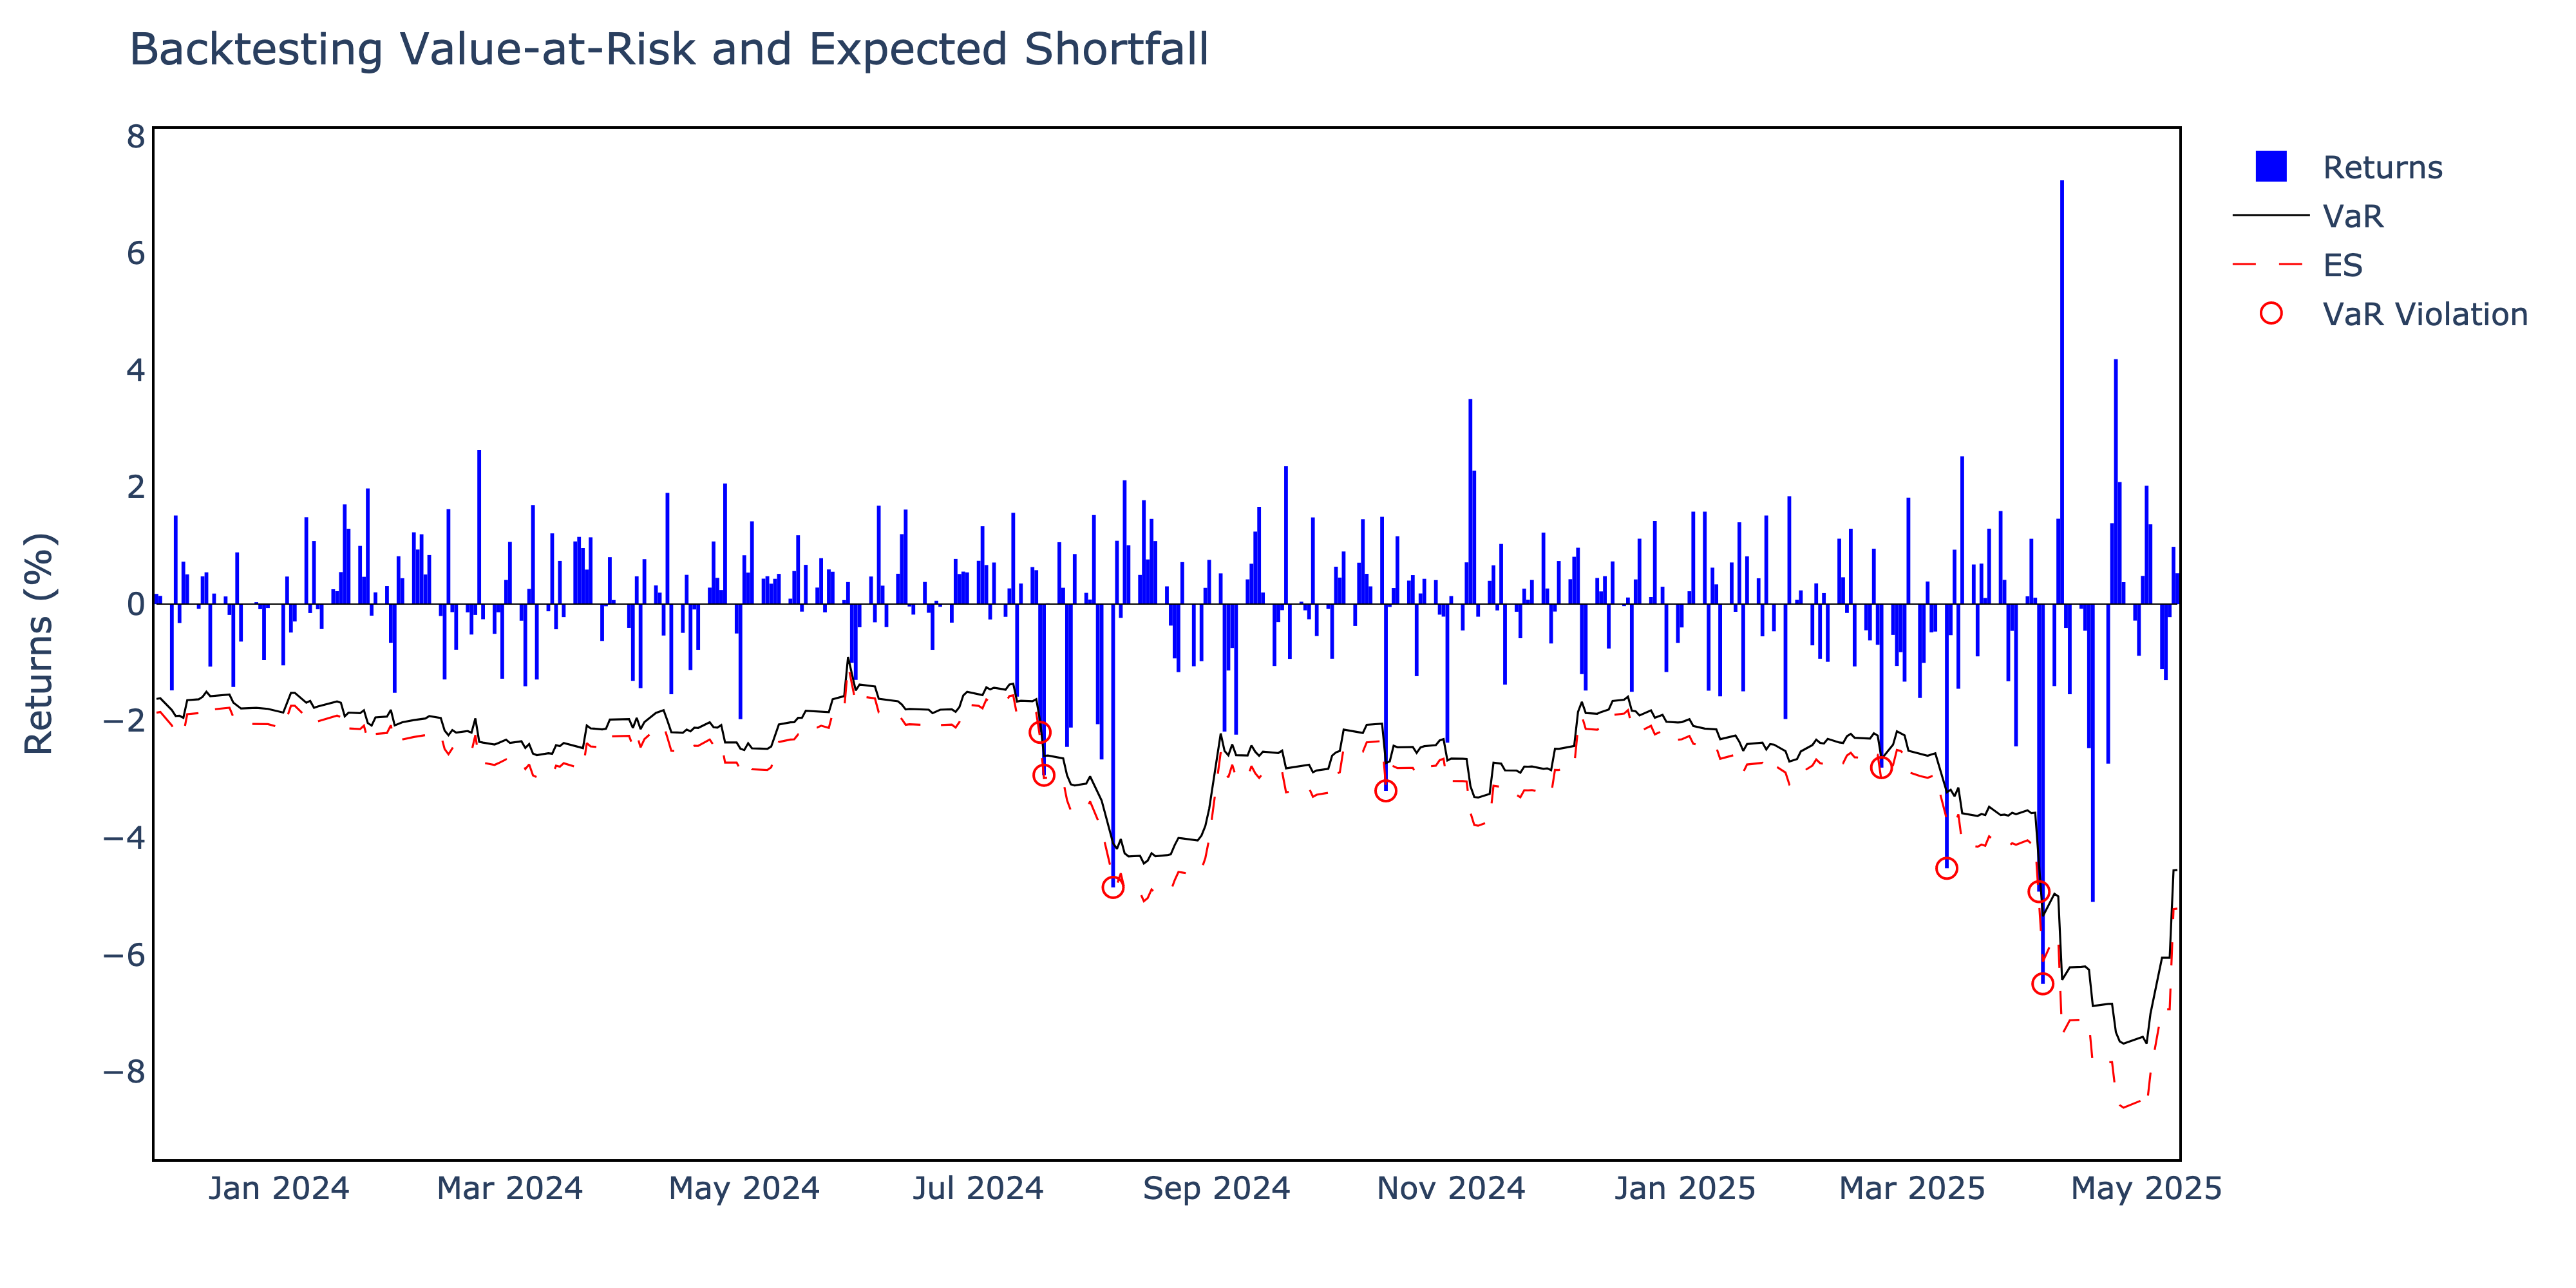


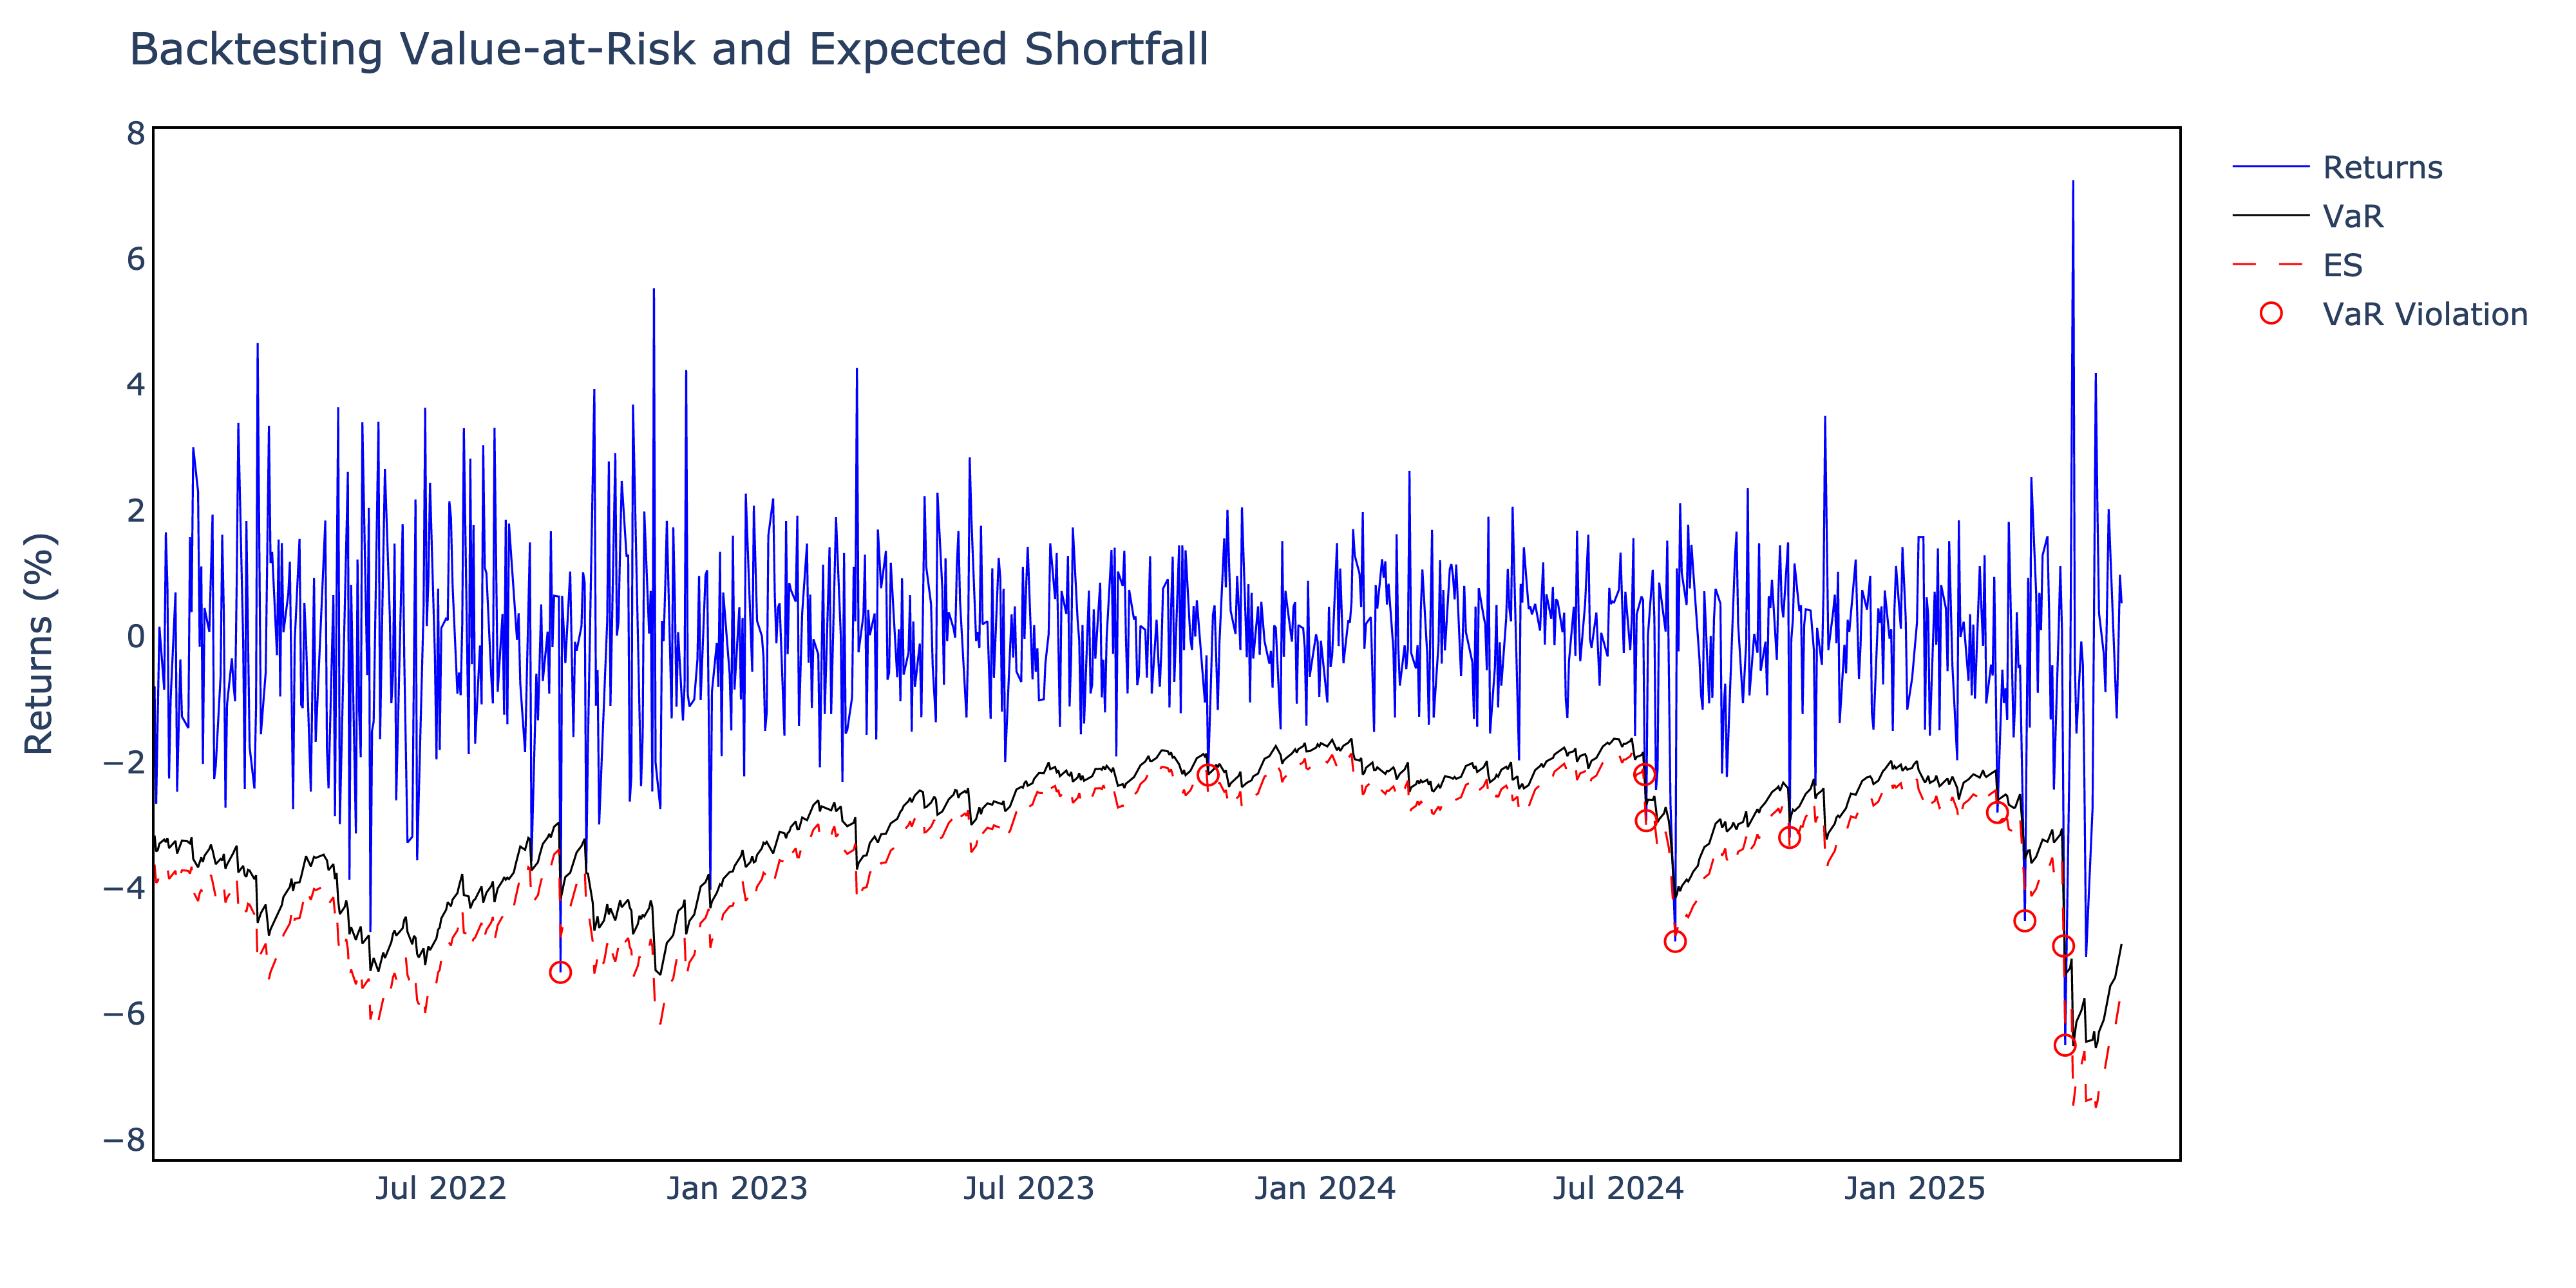

In [9]:
# Plot MA model results
fig_ma_es = IP.plot_backtest(result_ma, subset=("2023-11-30", "2025-11-30"), interactive=False)

# Plot RiskMetrics model results
fig_rm_es = IP.plot_backtest(result_rm, interactive=False)


In [10]:
violations_ma, rate_ma = BT.count_violations(result_ma)

print("== MA Correlation VaR Backtest ==")
print(f"Total Violations: {violations_ma}")
print(f"Violation Rate: {rate_ma:.2f}%")

== MA Correlation VaR Backtest ==
Total Violations: 11
Violation Rate: 1.30%


In [11]:
violations_rm, rate_rm = BT.count_violations(result_rm)

print("== RiskMetrics Correlation VaR Backtest ==")
print(f"Total Violations: {violations_rm}")
print(f"Violation Rate: {rate_rm:.2f}%")

== RiskMetrics Correlation VaR Backtest ==
Total Violations: 10
Violation Rate: 1.16%


In [12]:
fig_ma_vol = IP.plot_volatility(result_ma["Volatility"])
fig_rm_vol = IP.plot_volatility(result_rm["Volatility"])

### Bakctesting 

In [13]:
# 1. Recompute monetary positions (already done)
x_rm = deepcopy(x_matrix)

# 2. Run RiskMetrics Correlation VaR
result_rm = CM.var_corr_ewma(x_rm)

# 3. Count violations
total_violations, violation_rate = BT.count_violations(result_rm)

# 4. Run Kupiec test
confidence_level = 0.99  # adjust if needed
kupiec_results = BT.kupiec_test(total_violations, len(result_rm), confidence_level)

# 5. Run Christoffersen test
christoffersen_results = BT.christoffersen_test(result_rm)

# 6. Joint test
joint_results = BT.joint_lr_test(
    LR_uc=kupiec_results["LR_uc"],
    LR_c=christoffersen_results["LR_c"]
)


In [14]:
print("=== VaR Backtesting Summary ===")
print(f"Total Violations: {total_violations}")
print(f"Violation Rate: {violation_rate:.2f}%")

print("\n-- Kupiec Test --")
for k, v in kupiec_results.items():
    print(f"{k}: {v}")

print("\n-- Christoffersen Test --")
for k, v in christoffersen_results.items():
    print(f"{k}: {v}")

print("\n-- Joint Test --")
for k, v in joint_results.items():
    print(f"{k}: {v}")


=== VaR Backtesting Summary ===
Total Violations: 10
Violation Rate: 1.16%

-- Kupiec Test --
LR_uc: 0.20264477883895893
p_value: 0.6525944728868915
reject_null: False

-- Christoffersen Test --
LR_c: 8.402857301615938
p_value: 0.003746317017619738
reject_null: True

-- Joint Test --
LR_total: 8.605502080454897
p_value: 0.013531282658413857
reject_null: True


In [15]:
# 1. Recompute monetary positions (already done)
x_rm = deepcopy(x_matrix)

# 2. Run RiskMetrics Correlation VaR
result_rm = CM.var_corr_ewma(x_rm)

# 3. Count violations
total_violations, violation_rate = BT.count_violations(result_ma)

# 4. Run Kupiec test
confidence_level = 0.99  # adjust if needed
kupiec_results = BT.kupiec_test(total_violations, len(result_ma), confidence_level)

# 5. Run Christoffersen test
christoffersen_results = BT.christoffersen_test(result_ma)

# 6. Joint test
joint_results = BT.joint_lr_test(
    LR_uc=kupiec_results["LR_uc"],
    LR_c=christoffersen_results["LR_c"]
)


In [16]:
print("=== VaR Backtesting Summary ===")
print(f"Total Violations: {total_violations}")
print(f"Violation Rate: {violation_rate:.2f}%")

print("\n-- Kupiec Test --")
for k, v in kupiec_results.items():
    print(f"{k}: {v}")

print("\n-- Christoffersen Test --")
for k, v in christoffersen_results.items():
    print(f"{k}: {v}")

print("\n-- Joint Test --")
for k, v in joint_results.items():
    print(f"{k}: {v}")


=== VaR Backtesting Summary ===
Total Violations: 11
Violation Rate: 1.30%

-- Kupiec Test --
LR_uc: 0.7037250158484909
p_value: 0.4015348586031916
reject_null: False

-- Christoffersen Test --
LR_c: 7.512138920283576
p_value: 0.006128455246418252
reject_null: True

-- Joint Test --
LR_total: 8.215863936132067
p_value: 0.016441741438201984
reject_null: True
